In [1]:
from age_model import TfProbabilityResnet50Classifier, TfProbabilityCnnClassifier
from tensorflow_datasets import load
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt

In [15]:
train_ds, test_ds = load('mnist',
                         split=['train', 'test'],
                         as_supervised=True)

In [16]:
 # Normalize and one-hot
def ohe_normalize(images, labels):
    images = tf.cast(images, tf.float32)
    images = tf.divide(images, 255.0)

    labels = tf.one_hot(labels, 10)

    return images, labels


train_ds = train_ds.batch(128*24).map(ohe_normalize).shuffle(128*24).prefetch(tf.data.AUTOTUNE)
test_ds = test_ds.batch(128*24).map(ohe_normalize).prefetch(tf.data.AUTOTUNE)

# Outputs a tuple of two elements, first --> Images, second --> Labels
train_ds.element_spec

(TensorSpec(shape=(None, 28, 28, 1), dtype=tf.float32, name=None),
 TensorSpec(shape=(None, 10), dtype=tf.float32, name=None))

In [7]:
model_cnn = TfProbabilityCnnClassifier(input_dim=(28, 28, 1), n_classes=10)
model_cnn.summary()

Model: "tf_probability_cnn_classifier_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_reparameterization_5  (None, 28, 28, 16)       320       
 7 (Conv2DReparameterization                                     
 )                                                               
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_reparameterization_5  (None, 14, 14, 32)       9280      
 8 (Conv2DReparameterization                                     
 )                                                               
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                               

In [8]:
model_cnn.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
469/469 [==============================] - 32s 61ms/step - loss: 4.7856 - accuracy: 0.6668 - val_loss: 4.1595 - val_accuracy: 0.9059
Epoch 2/10
469/469 [==============================] - 27s 58ms/step - loss: 4.0299 - accuracy: 0.9257 - val_loss: 3.8913 - val_accuracy: 0.9465
Epoch 3/10
469/469 [==============================] - 27s 58ms/step - loss: 3.7932 - accuracy: 0.9521 - val_loss: 3.6786 - val_accuracy: 0.9582
Epoch 4/10
469/469 [==============================] - 28s 59ms/step - loss: 3.5805 - accuracy: 0.9617 - val_loss: 3.4635 - val_accuracy: 0.9656
Epoch 5/10
469/469 [==============================] - 28s 59ms/step - loss: 3.3746 - accuracy: 0.9682 - val_loss: 3.2698 - val_accuracy: 0.9699
Epoch 6/10
469/469 [==============================] - 27s 58ms/step - loss: 3.1815 - accuracy: 0.9718 - val_loss: 3.0862 - val_accuracy: 0.9752
Epoch 7/10
469/469 [==============================] - 28s 59ms/step - loss: 2.9992 - accuracy: 0.9745 - val_loss: 2.9125 - val_accuracy:

In [9]:
model_resnet = TfProbabilityResnet50Classifier(input_dim=(28, 28, 1), n_classes=10)
model_resnet.summary()

Model: "bayesian_resnet_50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_4 (InputLayer)           [(None, 28, 28, 1)]  0           []                               
                                                                                                  
 zero_padding2d_2 (ZeroPadding2  (None, 34, 34, 1)   0           ['input_4[0][0]']                
 D)                                                                                               
                                                                                                  
 conv2d_reparameterization_61 (  (None, 14, 14, 64)  6400        ['zero_padding2d_2[0][0]']       
 Conv2DReparameterization)                                                                        
                                                                                 

In [10]:
model_resnet.fit(train_ds, epochs=10, validation_data=test_ds)

Epoch 1/10
469/469 [==============================] - 1444s 3s/step - loss: 967.7079 - accuracy: 0.0913 - val_loss: 939.7535 - val_accuracy: 0.1107
Epoch 2/10
469/469 [==============================] - 1530s 3s/step - loss: 911.4327 - accuracy: 0.0497 - val_loss: 884.0946 - val_accuracy: 0.1121
Epoch 3/10
469/469 [==============================] - 1469s 3s/step - loss: 856.0320 - accuracy: 0.0319 - val_loss: 830.0217 - val_accuracy: 0.1135
Epoch 4/10
469/469 [==============================] - 1367s 3s/step - loss: 802.3080 - accuracy: 0.0234 - val_loss: 780.1468 - val_accuracy: 0.1133
Epoch 5/10
469/469 [==============================] - 1331s 3s/step - loss: 755.1218 - accuracy: 0.0513 - val_loss: 732.2926 - val_accuracy: 0.1061
Epoch 6/10
469/469 [==============================] - 1329s 3s/step - loss: 710.2072 - accuracy: 0.1353 - val_loss: 689.1619 - val_accuracy: 0.0990
Epoch 7/10
469/469 [==============================] - 1359s 3s/step - loss: 670.0233 - accuracy: 0.1483 - val_lo

In [ ]:
model_resnet.fit(train_ds, epochs=1, validation_data=test_ds, batch_size=128 * 24)

13/20 [==================>...........] - ETA: 7:06 - loss: 548.3408 - accuracy: 0.1547

In [21]:
example_images = []
example_labels = []

for x, y in test_ds.take(10):
    example_images.append(x.numpy())
    example_labels.append(y.numpy())

example_images = np.concatenate(example_images, axis = 0)
example_labels = np.concatenate(example_labels, axis = 0)

In [22]:
def analyse_model_prediction(image, label = None, forward_passes = 10):
    if label is not None:
        label = np.argmax(label, axis = -1)

    extracted_probabilities = np.empty(shape=(forward_passes, 10))
    extracted_std = np.empty(shape=(forward_passes, 10))
    for i in range(forward_passes):
        model_output_distribution = model(tf.expand_dims(image,
                                                  axis = 0))
        extracted_probabilities[i] = model_output_distribution.mean().numpy().flatten()
        extracted_std[i] = model_output_distribution.stddev().numpy().flatten()

    fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(16, 6),
                                   gridspec_kw={'width_ratios': [2, 4]})
    plt.xticks(fontsize = 16, rotation = 45)
    plt.yticks(fontsize = 16)

    # Show the image and the true label if provided.
    ax1.imshow(image.squeeze(), cmap='gray')
    ax1.axis('off')
    if label is not None:
        ax1.set_title('True Label: {}'.format(str(label)), fontsize = 20)
    else:
        ax1.set_title('True Label Not Given', fontsize = 20)

    # Obtain the 95% prediction interval.
    # extracted_probabilities.shape = (forward_passes, 10)
    # So if we sample from the model 100 times, there will be 100 different
    # values for each of the 10 classes.
    # We get the interval for each of the classes independently.
    pct_2p5 = np.array([np.percentile(extracted_probabilities[:, i],
                                      2.5) for i in range(10)])
    pct_97p5 = np.array([np.percentile(extracted_probabilities[:, i],
                                       97.5) for i in range(10)])

    # Std also contains 100 different values. We take median across the column
    # to obtain a single value for each of the class label.
    extracted_std = np.median(extracted_std, axis = 0)
    highest_var_label = np.argmax(extracted_std, axis = -1)
    if label is not None:
        print('Label %d has the highest std in this'
        ' prediction with the value %.3f' %(highest_var_label,
                                            extracted_std[highest_var_label]))
    else:
      print('Std Array:', extracted_std)

    bar = ax2.bar(np.arange(10), pct_97p5, color='red')
    if label is not None:
        bar[int(label)].set_color('green')

    ax2.bar(np.arange(10), pct_2p5-0.02, color='white',
            linewidth=4, edgecolor='white')
    ax2.set_xticks(np.arange(10))

    ax2.set_ylim([0, 1])
    ax2.set_ylabel('Probability', fontsize = 18)
    ax2.set_title("Model's Probabilities", fontsize = 20)
    plt.show()

Label 9 has the highest std in this prediction with the value 0.396


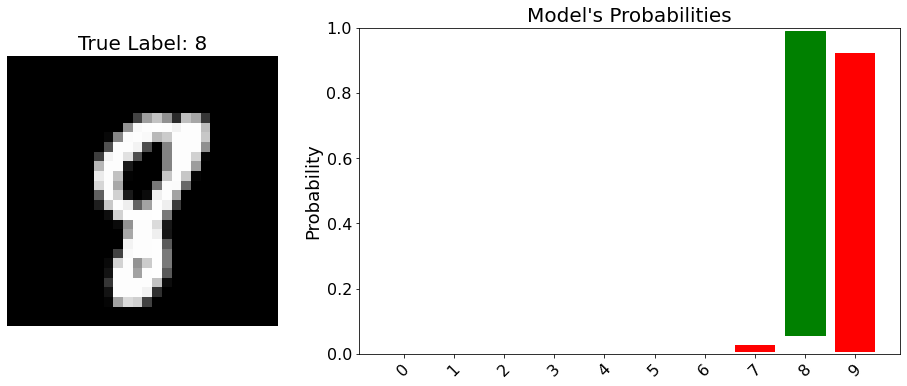

In [23]:
analyse_model_prediction(example_images[284], example_labels[284])

Label 0 has the highest std in this prediction with the value 0.000


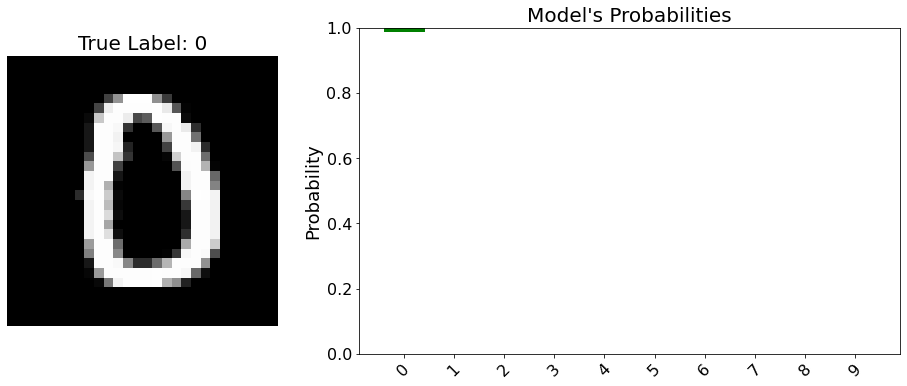

In [24]:
analyse_model_prediction(example_images[50], example_labels[50])

Label 0 has the highest std in this prediction with the value 0.104


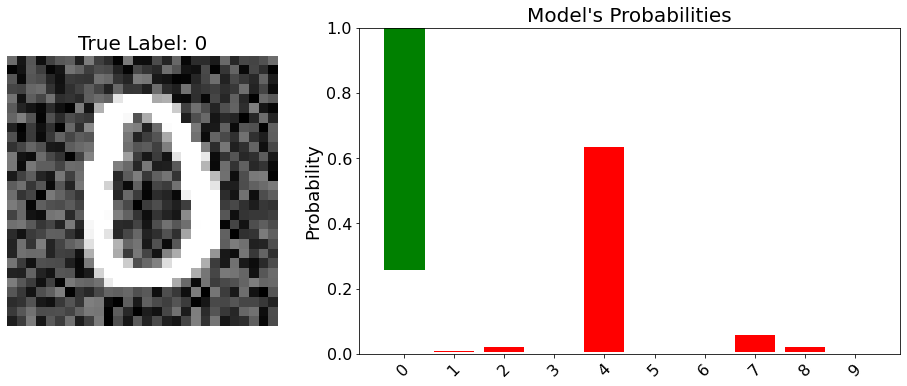

In [25]:
noise_vector = np.random.uniform(size = (28, 28, 1), low = 0, high = 0.5)
noisy_image = np.clip(example_images[50] + noise_vector, 0, 1)
analyse_model_prediction(noisy_image, example_labels[50])

Label 0 has the highest std in this prediction with the value 0.430


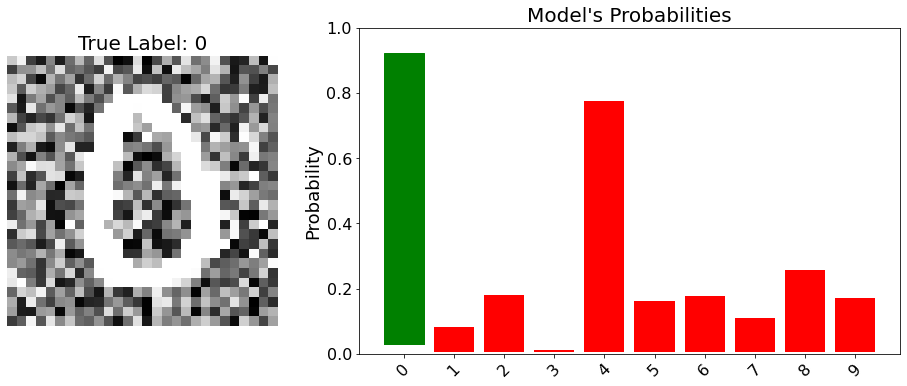

In [26]:
noise_vector = np.random.uniform(size = (28, 28, 1), low = 0, high = 0.5)
noisy_image = np.clip(example_images[50] + noise_vector*2, 0, 1)
analyse_model_prediction(noisy_image, example_labels[50])

Std Array: [0.40813014 0.15747809 0.20125473 0.10609014 0.27863562 0.28839226
 0.1491679  0.15689486 0.24372438 0.31577645]


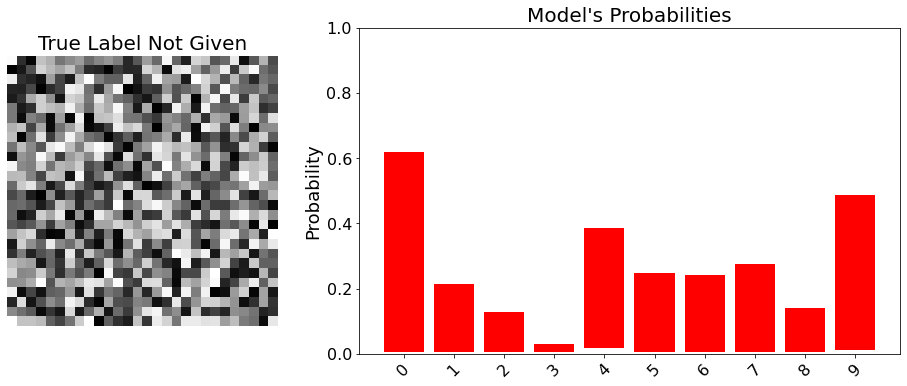

In [27]:
analyse_model_prediction(np.random.uniform(size = (28, 28, 1), low = 0,
                                           high = 1))